In [1]:
# only for google colab
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/Colab Notebooks/ATiML-project-SS20')
!cd "/content/drive/My Drive/Colab Notebooks/ATiML-project-SS20"

ModuleNotFoundError: No module named 'google.colab'

In [3]:
from corpus import load_meta_data
from features import load_features
import pandas as pd
import numpy as np

In [4]:
test_features = pd.read_csv('feature_collection_test.csv', index_col='book_id')
test_features
train_features = pd.read_csv('feature_collection_train.csv', index_col='book_id')
features = pd.concat([test_features, train_features])

In [5]:
meta_data = load_meta_data()
#target = meta_data.guten_genre
test_target = meta_data.guten_genre[test_features.index]
train_target = meta_data.guten_genre[train_features.index]
target = pd.concat([test_target, train_target])
target

book_id
pg9305                  Literary
pg32929                 Literary
pg16398                 Literary
pg15430                 Literary
pg36027                 Literary
                   ...          
pg41863                 Literary
pg16730                 Literary
pg41794                 Literary
pg35361    Detective and Mystery
pg30286                 Literary
Name: guten_genre, Length: 994, dtype: object

In [17]:
#features = load_features()#.dropna()
#del features['book_id']
features

,title_word_count,title_avg_word_length,._count,!_count,?_count,",_count",``_count,length,proper_names,pos_sentiment,...,point_of_view,sim_alle,sim_cs,sim_dam,sim_gah,sim_hawas,sim_lit,sim_lar,sim_saa,sim_ws
book_id,,,,,,,,,,,,,,,,,,,,,
pg9305,8,4.625000,0.051708,0.001633,0.008320,0.058529,0.024736,44713,0.004943,0.125,...,0.695600,0.459572,0.702628,0.467098,0.592582,0.725154,0.705087,0.543083,0.725500,0.670687
pg32929,6,4.500000,0.039288,0.005430,0.007555,0.090617,0.032549,123752,0.003079,0.132,...,0.539964,0.562535,0.690813,0.462243,0.612412,0.724947,0.535586,0.575159,0.652748,0.651838
pg16398,3,6.000000,0.036707,0.001431,0.003141,0.058901,0.011930,183070,0.001961,0.122,...,0.288923,0.582899,0.659150,0.543943,0.574176,0.608334,0.622252,0.538817,0.642680,0.643769
pg15430,4,3.750000,0.040365,0.001825,0.006299,0.054571,0.023055,100804,0.002867,0.146,...,0.535310,0.408262,0.652396,0.473204,0.606257,0.645742,0.607971,0.350185,0.607329,0.669333
pg36027,2,7.500000,0.036511,0.005221,0.004993,0.068687,0.013662,149023,0.001443,0.147,...,0.402950,0.727297,0.541773,0.617349,0.678673,0.606776,0.511537,0.582037,0.555396,0.523843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pg41863,1,5.000000,0.032448,0.007085,0.005764,0.064980,0.016266,47707,0.006288,0.148,...,0.368711,0.628703,0.561747,0.674020,0.714789,0.659321,0.593128,0.765324,0.610690,0.601280
pg16730,4,4.750000,0.039480,0.003817,0.004561,0.057717,0.011869,107421,0.007205,0.143,...,0.433869,0.652002,0.590926,0.645154,0.720312,0.675704,0.616858,0.757049,0.548497,0.580671
pg41794,3,4.666667,0.026383,0.003806,0.005386,0.078666,0.017664,93014,0.006891,0.099,...,0.656459,0.527127,0.640549,0.642032,0.669111,0.748341,0.581594,0.669707,0.576782,0.622320


## Overview

* feature scaling
* test-train-split
* random oversampling on train set
* training of a decision tree
* evaluation

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import RandomOverSampler, SMOTE

from sklearn.naive_bayes import ComplementNB

from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced

Using TensorFlow backend.


,title_word_count,title_avg_word_length,._count,!_count,?_count,",_count",``_count,length,proper_names,pos_sentiment,...,point_of_view,sim_alle,sim_cs,sim_dam,sim_gah,sim_hawas,sim_lit,sim_lar,sim_saa,sim_ws
book_id,,,,,,,,,,,,,,,,,,,,,
pg33959,2.0,6.500000,0.046566,0.001783,0.003407,0.055363,0.014167,100373.0,0.003955,0.127,...,0.535602,0.421292,0.611828,0.461601,0.473397,0.452076,0.951477,0.443057,0.549922,0.552523
pg39813,3.0,5.333333,0.040012,0.008491,0.004927,0.064256,0.016506,140858.0,0.004849,0.129,...,0.384162,0.481436,0.607801,0.491433,0.487918,0.609389,0.584708,0.469269,0.507434,0.587734
pg14253,1.0,6.000000,0.053339,0.002668,0.006978,0.063242,0.017716,209527.0,0.002014,0.123,...,0.376931,0.509120,0.503969,0.486948,0.711182,0.503532,0.493744,0.567550,0.592419,0.565228
pg23009,3.0,4.000000,0.041317,0.004381,0.004230,0.054611,0.010726,13239.0,0.007705,0.159,...,0.230461,0.661231,0.701782,0.534127,0.668853,0.690203,0.672599,0.396049,0.683249,0.705074
pg30111,3.0,3.666667,0.038505,0.007383,0.004643,0.062362,0.024377,169302.0,0.001447,0.136,...,0.471823,0.599758,0.510485,0.643723,0.557201,0.628951,0.490321,0.556135,0.657866,0.566806
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pg41863,1.0,5.000000,0.032448,0.007085,0.005764,0.064980,0.016266,47707.0,0.006288,0.148,...,0.368711,0.628703,0.561747,0.674020,0.714789,0.659321,0.593128,0.765324,0.610690,0.601280
pg16730,4.0,4.750000,0.039480,0.003817,0.004561,0.057717,0.011869,107421.0,0.007205,0.143,...,0.433869,0.652002,0.590926,0.645154,0.720312,0.675704,0.616858,0.757049,0.548497,0.580671
pg41794,3.0,4.666667,0.026383,0.003806,0.005386,0.078666,0.017664,93014.0,0.006891,0.099,...,0.656459,0.527127,0.640549,0.642032,0.669111,0.748341,0.581594,0.669707,0.576782,0.622320


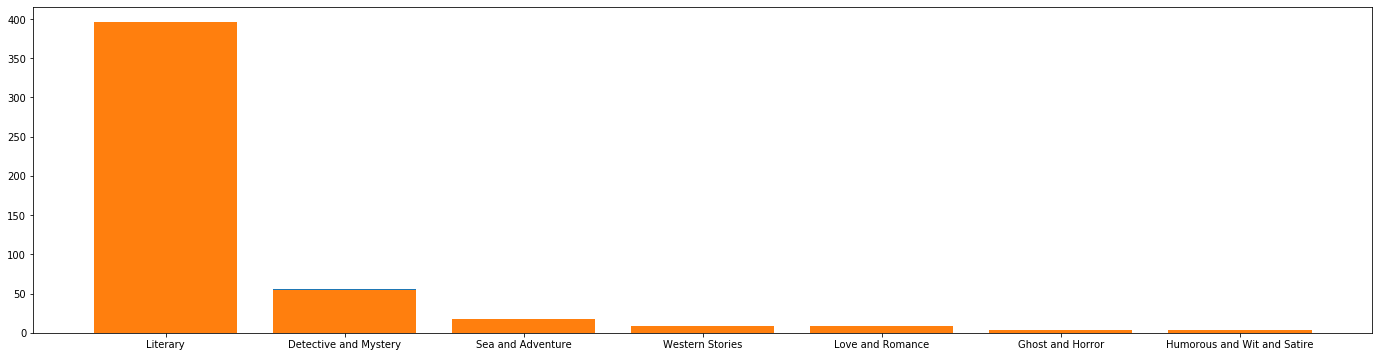

In [54]:
#train, test = train_test_split(features, stratify=target[features_scaled.index])
import maEva
import importlib
importlib.reload(maEva)
#(X_train, y_train, X_test, y_test) = maEva.GetTrainTestSplit(features, target, draw_plot = True, use_pca = False,
#                                                            over_sample = False)
(X_train, X_test) = maEva.GetTrainTestFromSplit(train_features, test_features, target, draw_plot = True, use_pca = False,
                                                            over_sample = False)
y_train = target[X_train.index]
y_test = target[X_test.index]
X_train

## Complement Naive Bayes 

In [55]:
clf = ComplementNB()
#clf.fit(train, target[train.index])
clf.fit(X_train, y_train)

ComplementNB(alpha=1.0, class_prior=None, fit_prior=True, norm=False)

In [56]:
#train_pred = clf.predict(train)
train_pred = clf.predict(X_train)

                             precision    recall  f1-score   support

      Detective and Mystery       0.10      0.39      0.16        56
           Ghost and Horror       0.00      0.00      0.00         3
Humorous and Wit and Satire       0.00      0.00      0.00         3
                   Literary       0.80      0.51      0.62       396
           Love and Romance       0.00      0.00      0.00         9
          Sea and Adventure       0.00      0.00      0.00        18
            Western Stories       0.05      0.11      0.07         9

                   accuracy                           0.46       494
                  macro avg       0.14      0.14      0.12       494
               weighted avg       0.65      0.46      0.52       494



E:\Programme\anaconda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


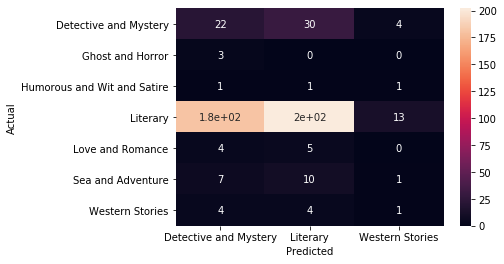

In [57]:
print(classification_report(y_train, train_pred))
cm = pd.crosstab(y_train, train_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True)

In [58]:
test_pred = clf.predict(X_test)

                             precision    recall  f1-score   support

      Detective and Mystery       0.13      0.58      0.21        55
           Ghost and Horror       0.00      0.00      0.00         3
Humorous and Wit and Satire       0.00      0.00      0.00         3
                   Literary       0.83      0.46      0.59       396
           Love and Romance       0.00      0.00      0.00         9
          Sea and Adventure       0.00      0.00      0.00        18
            Western Stories       0.04      0.11      0.06         9

                   accuracy                           0.44       493
                  macro avg       0.14      0.17      0.12       493
               weighted avg       0.68      0.44      0.50       493



E:\Programme\anaconda\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


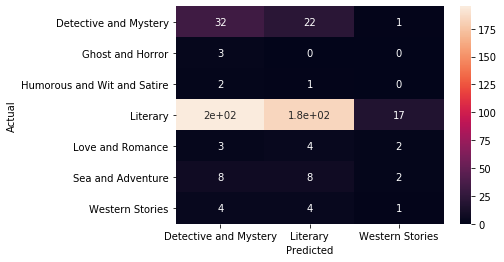

In [59]:
print(classification_report(y_test, test_pred))
cm = pd.crosstab(y_test, test_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(cm, annot=True)

In [60]:
maEva.GetAccuracy(y_test, test_pred)

0.16536796536796539